In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier
import time

Preparing data

In [2]:
df = pd.read_csv('my_data/train.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S
1,1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S
2,2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S
3,3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S
4,4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S


In [4]:
other_df = df[['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked']]
other_df['Relatives'] = df.SibSp + df.Parch
other_df = other_df.dropna()
other_df.Sex.replace(to_replace=['male', 'female'], value=[0, 1], inplace=True)
other_df.Embarked.replace(to_replace=['S', 'C', 'Q'], value=[0, 1, 2], inplace=True)

<ipython-input-4-34e5ca3139a4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  other_df['Relatives'] = df.SibSp + df.Parch


In [5]:
X = other_df.drop('Survived', axis=1)
y = other_df['Survived']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

------------------

Simple random forest

In [7]:
clf_simple = RandomForestClassifier(n_estimators=10)
clf_simple.fit(X_train, y_train)
print('Train score:', clf_simple.score(X_train, y_train))
print('Test score:', clf_simple.score(X_test, y_test))

Train score: 0.9707389865697788
Test score: 0.7173924326568745


In [11]:
clf_simple.feature_importances_

array([0.06187805, 0.18960646, 0.17866766, 0.4626951 , 0.07726287,
       0.02988986])

In [13]:
predicted = clf_simple.predict(X_test)
print('Precision:', precision_score(predicted, y_test))
print('Recall:', recall_score(predicted, y_test))

Precision: 0.6377126311979732
Recall: 0.6840062111801242


-------------------

Small random forest

In [15]:
clf_small = RandomForestClassifier(n_estimators=2)
clf_small.fit(X_train, y_train)

RandomForestClassifier(n_estimators=2)

In [16]:
print('Train score:', clf_small.score(X_train, y_train))
print('Test score:', clf_small.score(X_test, y_test))

Train score: 0.8808927528709531
Test score: 0.6848497430840297


In [17]:
clf_small.feature_importances_

array([0.06560291, 0.15971196, 0.18598921, 0.46692663, 0.09451261,
       0.02725667])

In [19]:
predicted = clf_small.predict(X_test)
print('Precision:', precision_score(predicted, y_test))
print('Recall:', recall_score(predicted, y_test))

Precision: 0.4869103631318615
Recall: 0.6893253629376601


-------------------

Dependency on n_estimators

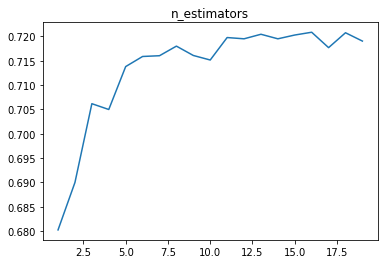

In [27]:
acc = []
values = range(1, 20)
for n_estimators in values:
    clf = RandomForestClassifier(n_estimators=n_estimators)
    clf.fit(X_train, y_train)
    acc.append(clf.score(X_test, y_test))
plt.plot(values, acc)
plt.title('n_estimators')
plt.show()

------------------

Dependency on min_samples_split parameter

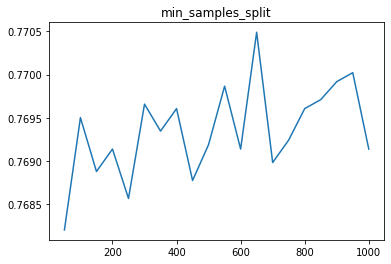

In [23]:
acc = []
values = range(50, 1001, 50)
for min_samples_split in values:
    clf = RandomForestClassifier(min_samples_split=min_samples_split)
    clf.fit(X_train, y_train)
    acc.append(clf.score(X_test, y_test))
plt.plot(values, acc)
plt.title('min_samples_split')
plt.show()

-----------------------

Dependency on min_samples_leaf parameter

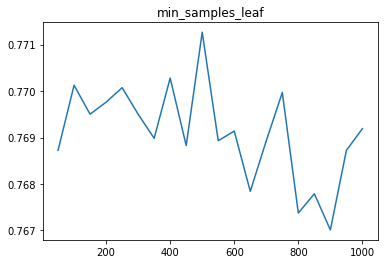

In [24]:
acc = []
values = range(50, 1001, 50)
for min_samples_leaf in values:
    clf = RandomForestClassifier(min_samples_leaf=min_samples_leaf)
    clf.fit(X_train, y_train)
    acc.append(clf.score(X_test, y_test))
plt.plot(values, acc)
plt.title('min_samples_leaf')
plt.show()

-----------------------

In [33]:
clf_best = GridSearchCV(RandomForestClassifier(), {
    'max_depth': range(5, 26, 5),
    'n_estimators': range(20, 101, 20)
})

In [34]:
start = time.time()
clf_best.fit(X_train, y_train)
print(time.time() - start)

1391.168306350708


In [35]:
print('Train score:', clf_best.score(X_train, y_train))
print('Test score:', clf_best.score(X_test, y_test))

Train score: 0.7710763641082203
Test score: 0.7698655732599782


In [36]:
predicted = clf_best.predict(X_test)
print('Precision:', precision_score(predicted, y_test))
print('Recall:', recall_score(predicted, y_test))

Precision: 0.7354325009048136
Recall: 0.7311982727599856


In [40]:
clf_best.best_estimator_.n_estimators

100

In [41]:
clf_best_2 = GridSearchCV(RandomForestClassifier(), {
    'max_depth': range(5, 16, 5),
    'n_estimators': range(100, 201, 20)
})

In [42]:
start = time.time()
clf_best_2.fit(X_train, y_train)
print(time.time() - start)

1989.7045361995697


In [43]:
print('Train score:', clf_best_2.score(X_train, y_train))
print('Test score:', clf_best_2.score(X_test, y_test))

Train score: 0.7876857198468825
Test score: 0.7691908444490579


In [44]:
predicted = clf_best_2.predict(X_test)
print('Precision:', precision_score(predicted, y_test))
print('Recall:', recall_score(predicted, y_test))

Precision: 0.7385691880805887
Recall: 0.7286360390383242


In [46]:
clf_best_2.best_estimator_

RandomForestClassifier(max_depth=10, n_estimators=180)